In [107]:
import pandas as pd
import numpy as np
import yfinance as yf
import wrds
import matplotlib.pyplot as plt
import math

In [108]:
yf.download

<function yfinance.multi.download(tickers, start=None, end=None, actions=False, threads=True, group_by='column', auto_adjust=False, back_adjust=False, progress=True, period='max', show_errors=True, interval='1d', prepost=False, proxy=None, rounding=False, **kwargs)>

In [140]:
spy = yf.download('TR')

[*********************100%***********************]  1 of 1 completed


In [141]:
spy = spy['Adj Close']
yc = pd.read_csv('T10Y2Y.csv')

In [142]:
mask = yc['T10Y2Y'] != "."
yc = yc[mask]
yc['T10Y2Y'] =yc['T10Y2Y'].apply(lambda x: float(x))
yc

,DATE,T10Y2Y
0,1979-01-02,-0.82
1,1979-01-03,-0.82
2,1979-01-04,-0.77
3,1979-01-05,-0.77
4,1979-01-08,-0.78
...,...,...
11168,2021-10-22,1.18
11169,2021-10-25,1.17
11170,2021-10-26,1.16
11171,2021-10-27,1.04


In [143]:
inverted = yc[yc['T10Y2Y']<0]
inverted

,DATE,T10Y2Y
0,1979-01-02,-0.82
1,1979-01-03,-0.82
2,1979-01-04,-0.77
3,1979-01-05,-0.77
4,1979-01-08,-0.78
...,...,...
7414,2007-06-04,-0.04
7415,2007-06-05,-0.01
10605,2019-08-27,-0.04
10606,2019-08-28,-0.03


In [144]:
tmp_list=[]
for i in yc['T10Y2Y']:
    if float(i) < 0:
        tmp_list.append(float(i))
yc.set_index(yc['T10Y2Y'], inplace = True)

In [145]:
temp_list=[]
for i in range(len(yc.index)):
    if yc.index[i] in my_list:
        temp_list.append(i)
df =yc.iloc[temp_list]

In [146]:
df['DATE'] = pd.to_datetime(df['DATE'])
combined=pd.merge(df, spy, left_on= 'DATE',right_on =['Date'])

<ipython-input-146-d17e33d34ee3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'])


In [149]:
recession = pd.read_csv('us recession2.csv')
mask = recession['JHDUSRGDPBR'] == 1
recession = recession[mask]
recession = pd.to_datetime(recession['DATE'])

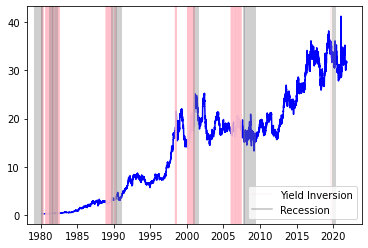

In [150]:
ax = plt.gca()
ax.plot(spy,color = 'b')
for date in combined['DATE']:
    plt.axvline(date, alpha=0.1, color = 'pink', label = 'Yield Inversion' if date == combined['DATE'][0] else "")
    
for line in recession:
    plt.axvline(line, alpha = 0.5, color = 'gray' , label = 'Recession' if line ==recession.iloc[0] else "" )
plt.legend(loc='best')